**Importing Libraries**

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Data Preprocessing**

***Training Image preprocessing***

In [9]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


***Validation Image Preprocessing***

In [11]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


**Building Model**

In [27]:
cnn = tf.keras.models.Sequential()

**Building Convolution Layer**

In [33]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [28]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [30]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [32]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [34]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [37]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [39]:
cnn.add(tf.keras.layers.Flatten())

In [41]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [43]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [45]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

**Compiling and Training Phase**

In [52]:
pip install tf_keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.1 kB/s eta 0:00:0000:0100:04
Note: you may need to restart the kernel to use updated packages.


In [56]:
TF_USE_LEGACY_KERAS=True

In [60]:
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [62]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [64]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1739s 791ms/step - accuracy: 0.4172 - loss: 2.0775 - val_accuracy: 0.8475 - val_loss: 0.4827
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1836s 836ms/step - accuracy: 0.8497 - loss: 0.4855 - val_accuracy: 0.9294 - val_loss: 0.2282
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1909s 869ms/step - accuracy: 0.9118 - loss: 0.2775 - val_accuracy: 0.9255 - val_loss: 0.2324
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2017s 918ms/step - accuracy: 0.9367 - loss: 0.1945 - val_accuracy: 0.9409 - val_loss: 0.1876
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1934s 880ms/step - accuracy: 0.9535 - loss: 0.1415 - val_accuracy: 0.9535 - val_loss: 0.1475
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1794s 817ms/step - accuracy: 0.9626 - loss: 0.1129 - val_accuracy: 0.9536 - val_loss: 0.1540
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1754s 798ms/step - accuracy: 0.9710 - loss: 0.0864 - val_accuracy: 0.9527 - val_loss: 0.1601
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1854s 844ms/s

**Saving the Model**

In [77]:
cnn.save('trained_plant_disease_model.keras')

In [79]:
training_history.history #Return Dictionary of history

{'accuracy': [0.6198734045028687,
  0.8685681819915771,
  0.9177039861679077,
  0.9428835511207581,
  0.9571093320846558,
  0.9660857915878296,
  0.9729852676391602,
  0.977395236492157,
  0.9790881276130676,
  0.9818336963653564],
 'loss': [1.297153353691101,
  0.4162830412387848,
  0.2536502480506897,
  0.17552925646305084,
  0.1299319565296173,
  0.10480818152427673,
  0.08091045916080475,
  0.06926452368497849,
  0.06753712147474289,
  0.056372180581092834],
 'val_accuracy': [0.8474846482276917,
  0.9294331669807434,
  0.9255064725875854,
  0.9409287571907043,
  0.9535055756568909,
  0.9536194205284119,
  0.9527088403701782,
  0.9664807915687561,
  0.9607329964637756,
  0.9676189422607422],
 'val_loss': [0.48271942138671875,
  0.22823286056518555,
  0.23239757120609283,
  0.18761372566223145,
  0.14749585092067719,
  0.15402264893054962,
  0.16009530425071716,
  0.11054757237434387,
  0.1333521157503128,
  0.10530880093574524]}

In [81]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [83]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


**Accuracy Visualization**

In [107]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 400s 182ms/step - accuracy: 0.9933 - loss: 0.0225
Training accuracy: 0.9929440021514893


In [111]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)


550/550 ━━━━━━━━━━━━━━━━━━━━ 95s 173ms/step - accuracy: 0.9702 - loss: 0.0996
Validation accuracy: 0.9676189422607422


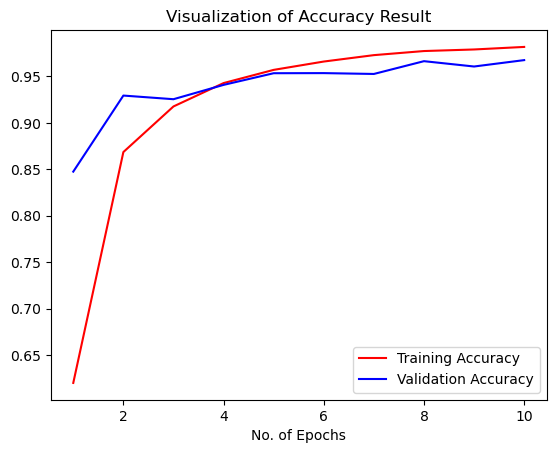

In [85]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

**Some other metrics for model evaluation**

In [97]:
import tensorflow as tf

# Load the model
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

In [88]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize the ImageDataGenerator for validation data
validation_datagen = ImageDataGenerator(rescale=1./255)

# Load the validation data (make sure you have the correct path)
validation_set = validation_datagen.flow_from_directory(
    'valid',  # Replace with the correct path
    target_size=(64, 64),        # Resize images to 64x64, adjust as needed
    batch_size=32,
    class_mode='categorical'
)

# Get the class names
class_names = list(validation_set.class_indices.keys())

# Print class names
print("Class Names:", class_names)


Found 17572 images belonging to 38 classes.
Class Names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___S

In [15]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [68]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 160s 9ms/step


In [57]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [58]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [70]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [72]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [90]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_names))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.93      0.96       504
                                 Apple___Black_rot       0.98      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.99      0.97      0.98       440
                                   Apple___healthy       0.92      0.96      0.94       502
                               Blueberry___healthy       0.92      0.99      0.96       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.98      0.99       421
                 Cherry_(including_sour)___healthy       0.96      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.98      0.84      0.90       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.88      0.99      0.

**Confusion Matrix visualization**

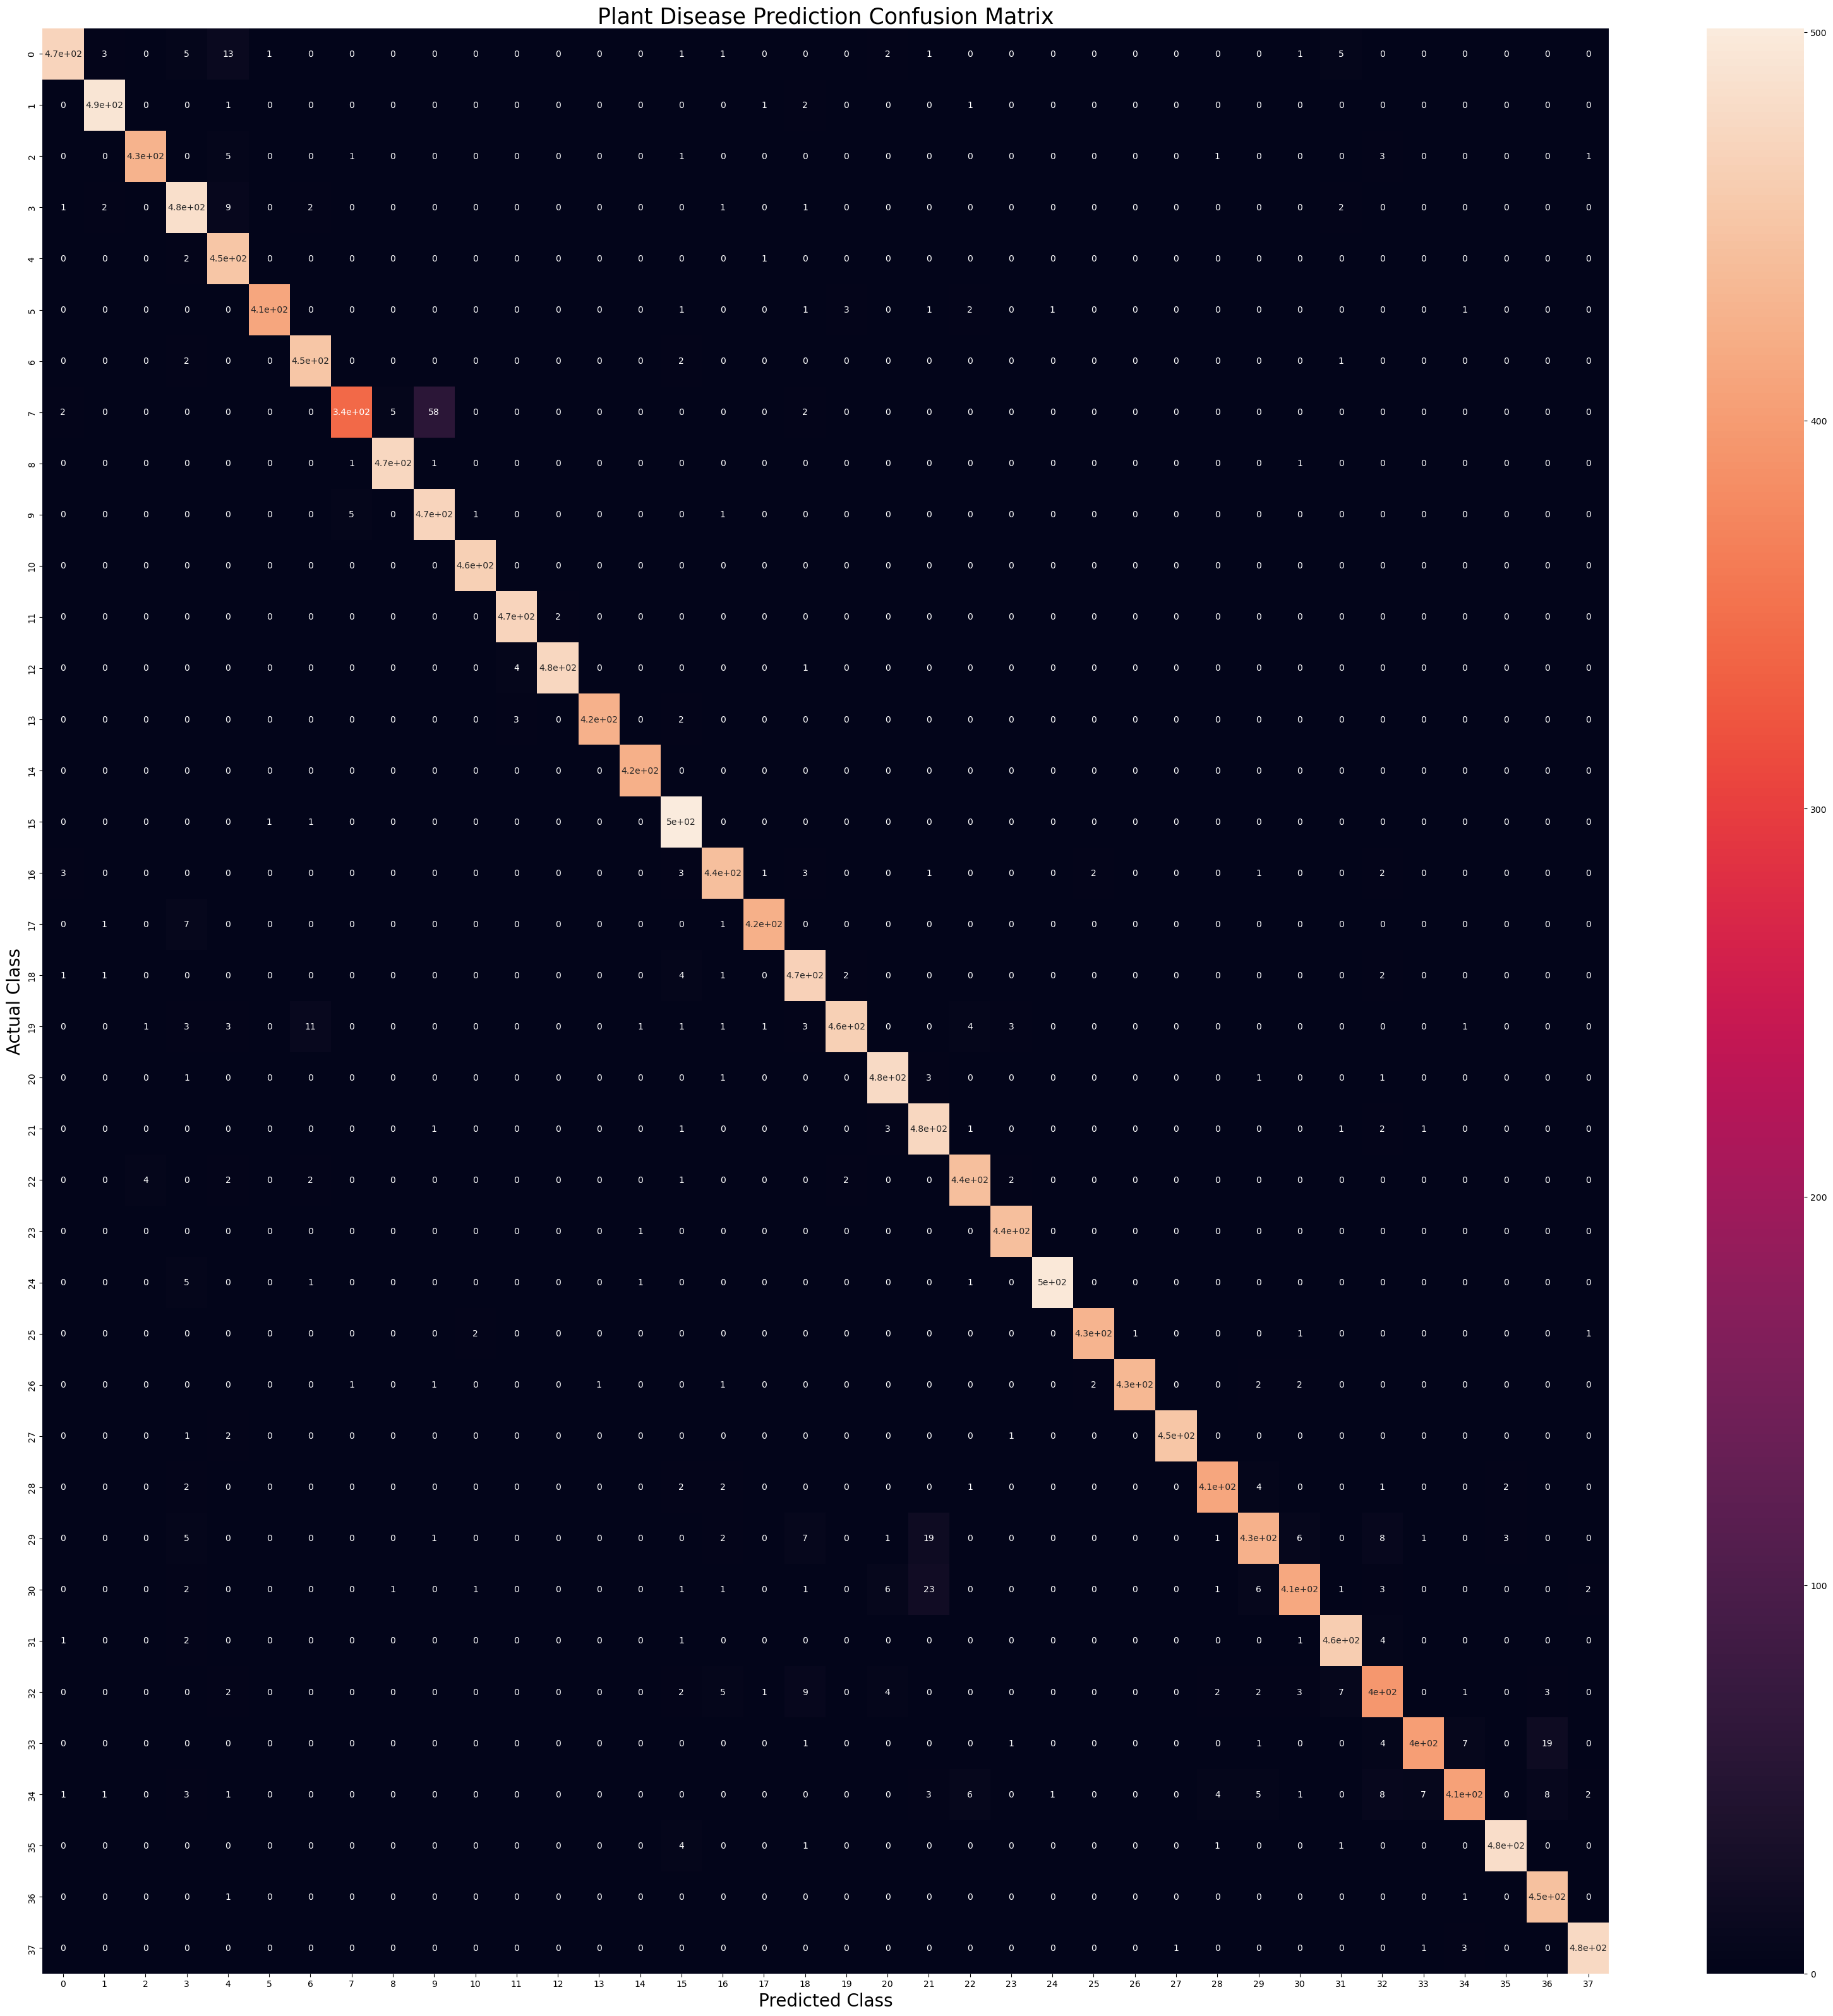

In [92]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()